In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
import env
import os
import prepare
import acquire

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire


# Exercises - classification_exercises

In [13]:
# #'S 1-3 WERE SET UP ITEMS

In [14]:
# 4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. 
#    Create a pandas dataframe, df_iris, from this data.

In [15]:
from pydataset import data
iris = data('iris')

In [16]:
df_iris = iris


In [17]:
#print the first 3 rows

df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [18]:
#print the number of rows and columns (shape)
df_iris.shape

(150, 5)

In [19]:
#print the column names
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [20]:
#print the data type of each column
df_iris.dtypes


Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [21]:
#print the summary statistics for each of the numeric variables
#df_iris.describe(exclude=object)  or df_iris.describe()
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [22]:
# 5. Read the data from this google sheet into a dataframe, df_google.

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
csv_export_url

'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/export?format=csv&gid=341089357'

In [23]:
df_googlesheet = pd.read_csv(csv_export_url)


In [24]:
#print the first 3 rows
df_googlesheet.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [25]:
#print the number of rows and columns
df_googlesheet.shape


(891, 12)

In [26]:
#print the column names  add .to_list() to clean it up
df_googlesheet.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
df_googlesheet.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [28]:
#print the data type of each column
df_googlesheet.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [29]:
#print the summary statistics for each of the numeric variables
df_googlesheet.describe(exclude='object')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
#print the unique values for each of your categorical variables



In [31]:
# 6. Download the previous exercise's file into an excel (File → Download → Microsoft Excel).
#    Read the downloaded file into a dataframe named df_excel.
df_excel = pd.read_excel("train.xlsx", sheet_name="train", header=1)
df_excel.head()

,1,0,3,"Braund, Mr. Owen Harris",male,22,1.1,0.1,A/5 21171,7.25,Unnamed: 10,S
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
4,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [32]:
#assign the first 100 rows to a new dataframe, df_excel_sample

# caan do this either way the copy(protects it by making a trully seperate DF
#df_excel_sample = df_excel.head(100)

df_excel_sample = df_excel.iloc[:100].copy()


In [33]:
df_excel_sample

,1,0,3,"Braund, Mr. Owen Harris",male,22,1.1,0.1,A/5 21171,7.25,Unnamed: 10,S
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.2833,C85,C
1,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
3,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
4,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
5,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
6,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
7,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
8,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
9,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S


In [34]:
#print the number of rows of your original dataframe
df_excel.shape[0]

890

In [35]:
#print the first 5 column names
column_names = df_excel.columns[:5].tolist()
print(column_names)

[1, 0, 3, 'Braund, Mr. Owen Harris', 'male']


In [36]:
#or this way returns as an Index with the dtype
print(df_excel.columns[:5])

Index([1, 0, 3, 'Braund, Mr. Owen Harris', 'male'], dtype='object')


In [37]:
#print the column names that have a data type of object
df_excel.select_dtypes(include='object').columns.tolist()


['Braund, Mr. Owen Harris', 'male', 'A/5 21171', 'Unnamed: 10', 'S']

In [38]:
#compute the range for each of the numeric variables.
num_cols = df_excel.select_dtypes(include='number').columns.tolist()
"""
the above code retuns a new DF that only includes columns containing numbers

the function below uses the min()and max() of each column and returns the range for each column
"""
for col in num_cols:
    col_range = df_excel[col].max() - df_excel[col].min()
    print(f"Range for {col}: {col_range}")

Range for 1: 889
Range for 0: 1
Range for 3: 2
Range for 22: 79.58
Range for 1.1: 8
Range for 0.1: 6
Range for 7.25: 512.3292


In [39]:
## Part 2 copied o VS File

In [40]:
# 1. Make a function named get_titanic_data that returns the titanic data from the codeup data science database 
#    as a pandas data frame. Obtain your data from the Codeup Data Science Database.


In [41]:
import os

def get_titanic_data():
    filename = "titanic.csv"

    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('SELECT * FROM passengers', env.get_db_url('titanic_db'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename)

        # Return the dataframe to the calling code
        return df  


In [42]:
get_titanic_data()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [43]:
# 2. Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database 
#    as a pandas data frame. The returned data frame should include the actual name of the species in addition to 
#    the species_ids. Obtain your data from the Codeup Data Science Database.


In [44]:
def get_iris_data():
    filename = "iris.csv"

    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('select * from measurements join species using (species_id)', env.get_db_url('iris_db'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename)

        # Return the dataframe to the calling code
        return df  

In [45]:
get_iris_data()

,Unnamed: 0,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,1,2,4.9,3.0,1.4,0.2,setosa
2,2,1,3,4.7,3.2,1.3,0.2,setosa
3,3,1,4,4.6,3.1,1.5,0.2,setosa
4,4,1,5,5.0,3.6,1.4,0.2,setosa
5,5,1,6,5.4,3.9,1.7,0.4,setosa
6,6,1,7,4.6,3.4,1.4,0.3,setosa
7,7,1,8,5.0,3.4,1.5,0.2,setosa
8,8,1,9,4.4,2.9,1.4,0.2,setosa
9,9,1,10,4.9,3.1,1.5,0.1,setosa


In [46]:
# 3. Make a function named get_telco_data that returns the data from the telco_churn database in SQL. 
#    In your SQL, be sure to join contract_types, internet_service_types, payment_types tables with the customers 
#    table, so that the resulting dataframe contains all the contract, payment, and internet service options. 
#    Obtain your data from the Codeup Data Science Database.


In [47]:
def get_telco_data():
    filename = "telco.csv"

    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('select * from customers join contract_types using (contract_type_id) join internet_service_types using (internet_service_type_id) join payment_types using (payment_type_id)', env.get_db_url('telco_churn'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename)

        # Return the dataframe to the calling code
        return df  

In [48]:
get_telco_data()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,2,1,2,9987-LUTYD,Female,0,No,No,13,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,7040,2,1,1,9992-UJOEL,Male,0,No,No,2,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


# Exercises - Prepare

### Using the Iris Data:

In [49]:
# Use the function defined in acquire.py to load the iris data.
df = get_iris_data()

In [50]:
# Drop the species_id and measurement_id columns.
df = iris.drop(columns=['species_id', 'measurement_id'])

KeyError: "['species_id', 'measurement_id'] not found in axis"

In [51]:
# Rename the species_name column to just species.
df.rename(columns ={'species_name' : 'species'}, inplace=True)

In [52]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [53]:
#  Create dummy variables of the species name and concatenate onto the iris dataframe. 
# (This is for practice, we don't always have to encode the target, but if we used species as a feature, 
#  we would need to encode it).

dummy_df = pd.get_dummies(df[['species']], dummy_na=False, drop_first=[True, True])
dummy_df.head()

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [54]:
df = pd.concat([df, dummy_df], axis=1)
df.head(1)

,Unnamed: 0,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,0,1,1,5.1,3.5,1.4,0.2,setosa,0,0


In [55]:
# Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [56]:
def prep_iris(df):
    '''
    This function will drop any duplicate observations, 
    drop ['species_id', 'measurement_id'],Rename the species_name column to just species
    and create dummy variables of the species name and concatenate onto the iris dataframe. 
    '''
    df = df.drop_duplicates()
    df = df.drop(columns=['species_id', 'measurement_id'])
    df.rename(columns ={'species_name' : 'species'}, inplace=True)
    dummy_df = pd.get_dummies(df[['species']], dummy_na=False, drop_first=[True, True])
    df = pd.concat([df, dummy_df], axis=1)
    return df


In [57]:
df=prep_iris(df)

In [58]:
df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica,species_versicolor,species_virginica
0,0,5.1,3.5,1.4,0.2,setosa,0,0,0,0
1,1,4.9,3.0,1.4,0.2,setosa,0,0,0,0
2,2,4.7,3.2,1.3,0.2,setosa,0,0,0,0
3,3,4.6,3.1,1.5,0.2,setosa,0,0,0,0
4,4,5.0,3.6,1.4,0.2,setosa,0,0,0,0


### Using the Titanic dataset:

In [59]:
#Use the function defined in acquire.py to load the Titanic data.
df=get_titanic_data()

In [60]:
df

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [61]:
#Drop any unnecessary, unhelpful, or duplicated columns.

cols_to_drop = ['deck', 'embarked', 'class', 'age']
df = df.drop(columns=cols_to_drop)
df.shape


(891, 10)

In [62]:
#Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them
#onto the dataframe.

# Using drop_first leaves sex_male, embark_town_Queenstown, and embark_town_Southampton.

dummy_df = pd.get_dummies(df[['sex','embark_town']], dummy_na=False, drop_first=[True, True])
dummy_df.head()

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [63]:
# Concatenate the dummy_df dataframe above with the original df and validate.

df = pd.concat([df, dummy_df], axis=1)
df.head(1)


,Unnamed: 0,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,0,3,male,1,0,7.25,Southampton,0,1,0,1


In [64]:
#Create a function named prep_titanic that accepts the raw titanic data, and returns the data with 
#the transformations above applied.

In [65]:
def prep_titanic(df):
    '''
    This function will drop any duplicate observations, 
    drop ['deck', 'embarked', 'class', 'age'], fill missing embark_town with 'Southampton'
    and create dummy vars from sex and embark_town. 
    '''
    df = df.drop_duplicates()
    df = df.drop(columns=['deck', 'embarked', 'class', 'age'])
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    return df


In [66]:
prep_titanic(df)

KeyError: "['deck', 'embarked', 'class', 'age'] not found in axis"

### Using the Telco_churn dataset:


In [67]:
#Use the function defined in acquire.py to load the Telco data.
df=get_telco_data()
df.head()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [68]:
#Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns
#but keeping the corresponding string values, for example.
df = df.drop(columns=['payment_type_id', 'internet_service_type_id','contract_type_id'])

In [69]:
#Encode the categorical columns. Create dummy variables of the categorical columns and concatenate 
#them onto the dataframe.
dummy_df = pd.get_dummies(df[['gender','partner','dependents','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type']], dummy_na=False, drop_first=[True, True])
dummy_df.head()

,gender_Male,partner_Yes,dependents_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0
3,1,1,0,0,0,0,1,0,1,1,1,0,0,1,0,0,1,0
4,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1


In [70]:
df = pd.concat([df, dummy_df], axis=1)
df.head()

,Unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,...,0,1,0,1,0,0,0,0,0,1
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,...,1,0,0,0,0,0,0,0,0,1
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,...,0,1,1,0,0,1,0,0,1,0
3,3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,...,1,1,1,0,0,1,0,0,1,0
4,4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,...,0,1,1,0,0,1,0,0,0,1


In [71]:
#Create a function named prep_telco that accepts the raw telco data, and returns the 
#data with the transformations above applied.

In [72]:
def prep_telco(df):
    '''
    This function will drop any duplicate observations, 
    drop [payment_type_id', 'internet_service_type_id','contract_type_id']
    and create dummy vars from 'gender','partner','dependents','tech_support','streaming_tv','streaming_movies'
                                ,'paperless_billing','churn','contract_type','internet_service_type','payment_type'. 
    '''
    
    df = df.drop_duplicates()
    df = df.drop(columns=['payment_type_id', 'internet_service_type_id','contract_type_id'])    
    dummy_df = pd.get_dummies(df[['gender','partner','dependents','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type']], dummy_na=False, drop_first=[True, True])
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [73]:
df= prep_telco(df)

KeyError: "['payment_type_id', 'internet_service_type_id', 'contract_type_id'] not found in axis"

In [74]:
df.head()

,Unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,...,0,1,0,1,0,0,0,0,0,1
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,...,1,0,0,0,0,0,0,0,0,1
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,...,0,1,1,0,0,1,0,0,1,0
3,3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,...,1,1,1,0,0,1,0,0,1,0
4,4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,...,0,1,1,0,0,1,0,0,0,1


### Split your data

In [75]:
#Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.
def split_data(df,strat):
    '''
    Be sure to code it as train, validate, test = split_data(df,'column you want to stratify')
    take in a DataFrame and return train, validate, and test DataFrames; stratify on survived.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[{strat}])
    train, validate = train_test_split(train_validate, 
                                       test_size=.25, 
                                       random_state=123, 
                                       stratify=train_validate[{strat}])
    # Validate my split.
    print(f'train -> {train.shape}, {round(train.shape[0]*100 / df.shape[0],2)}%')
    print(f'validate -> {validate.shape},{round(validate.shape[0]*100 / df.shape[0],2)}%')
    print(f'test -> {test.shape}, {round(test.shape[0]*100 / df.shape[0],2)}%')
    return train, validate, test





In [76]:
train, validate, test = split_data(df,'species')

KeyError: "None of [Index(['species'], dtype='object')] are in the [columns]"

In [77]:
train.head()

NameError: name 'train' is not defined

In [78]:
train.dtype()

NameError: name 'train' is not defined

In [79]:
#Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

df= get_iris_data()
df = prep_iris(df)
train, validate, test = split_data(df,'species')

train -> (90, 8), 60.0%
validate -> (30, 8),20.0%
test -> (30, 8), 20.0%


In [80]:
#Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.
df = get_titanic_data()
df = prep_titanic(df)
train, validate, test = split_data(df,'survived')

train -> (534, 13), 59.93%
validate -> (178, 13),19.98%
test -> (179, 13), 20.09%


In [81]:
#Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.
df = get_telco_data()
df = prep_telco(df)
train, validate, test = split_data(df,'churn')

train -> (4225, 40), 59.99%
validate -> (1409, 40),20.01%
test -> (1409, 40), 20.01%


In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 5911 to 3586
Data columns (total 40 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            4225 non-null   int64  
 1   customer_id                           4225 non-null   object 
 2   gender                                4225 non-null   object 
 3   senior_citizen                        4225 non-null   int64  
 4   partner                               4225 non-null   object 
 5   dependents                            4225 non-null   object 
 6   tenure                                4225 non-null   int64  
 7   phone_service                         4225 non-null   object 
 8   multiple_lines                        4225 non-null   object 
 9   online_security                       4225 non-null   object 
 10  online_backup                         4225 non-null   object 
 11  device_protect

# Exercises - Exploratory Analysis

In [83]:
# Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:


In [84]:
# 1. Acquire, prepare & split your data.
df= get_iris_data()
df = prep_iris(df)
train, validate, test = split_data(df,'species')

train -> (90, 8), 60.0%
validate -> (30, 8),20.0%
test -> (30, 8), 20.0%


In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 70 to 97
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          90 non-null     int64  
 1   sepal_length        90 non-null     float64
 2   sepal_width         90 non-null     float64
 3   petal_length        90 non-null     float64
 4   petal_width         90 non-null     float64
 5   species             90 non-null     object 
 6   species_versicolor  90 non-null     uint8  
 7   species_virginica   90 non-null     uint8  
dtypes: float64(4), int64(1), object(1), uint8(2)
memory usage: 5.1+ KB


In [86]:
# 2. Univariate Stats

In [87]:
train.describe(include='all')

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
count,90.000000,90.000000,90.000000,90.000000,90.000000,90,90.000000,90.000000
unique,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,versicolor,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN
mean,73.722222,5.875556,3.070000,3.782222,1.203333,NaN,0.333333,0.333333
std,44.458547,0.792282,0.436135,1.742114,0.755422,NaN,0.474045,0.474045
min,1.000000,4.400000,2.200000,1.200000,0.100000,NaN,0.000000,0.000000
25%,35.250000,5.225000,2.800000,1.600000,0.400000,NaN,0.000000,0.000000
50%,76.500000,5.800000,3.000000,4.250000,1.300000,NaN,0.000000,0.000000
75%,111.750000,6.400000,3.375000,5.100000,1.800000,NaN,1.000000,1.000000


array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

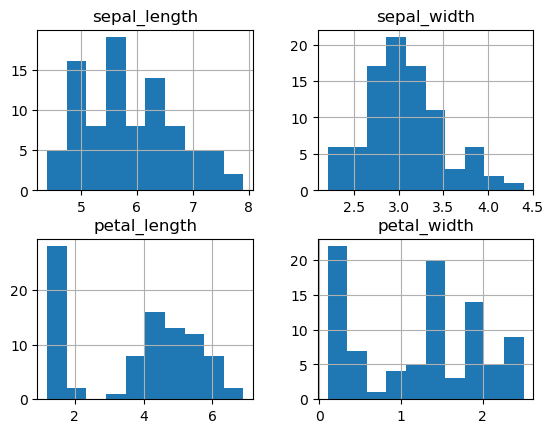

In [88]:
#  a. For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive 
      #statistics (using .describe()).
train.hist(column = ['sepal_length','sepal_width','petal_length','petal_width'])

<AxesSubplot:>

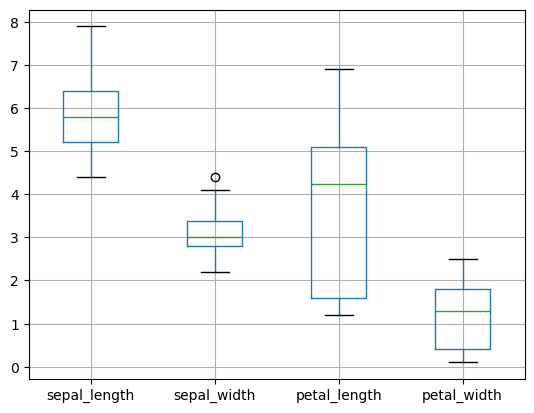

In [89]:
train.boxplot(column = ['sepal_length','sepal_width','petal_length','petal_width'])

In [90]:
train[['sepal_length','sepal_width','petal_length','petal_width']].describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width
count,90.000000,90.000000,90.000000,90.000000
mean,5.875556,3.070000,3.782222,1.203333
std,0.792282,0.436135,1.742114,0.755422
min,4.400000,2.200000,1.200000,0.100000
25%,5.225000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.400000,3.375000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [91]:
#  b. For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [92]:
train[['species','species_versicolor','species_virginica']].value_counts()


species     species_versicolor  species_virginica
setosa      0                   0                    30
versicolor  1                   0                    30
virginica   0                   1                    30
dtype: int64

In [93]:
# frequency table species
pd.crosstab(df['species'], 'no_of_species')

col_0,no_of_species
species,
setosa,50
versicolor,50
virginica,50


In [94]:
# frequency table petal_length
pd.crosstab(df['species_versicolor'], 'count_versicolor')

col_0,count_versicolor
species_versicolor,
0,100
1,50


In [95]:
# frequency table petal_width
pd.crosstab(df['species_virginica'], 'count_virgnica')

col_0,count_virgnica
species_virginica,
0,100
1,50


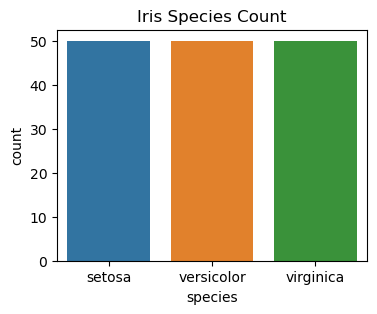

In [96]:
x=plt.subplots(1,1,figsize=(4,3))
sns.countplot('species',data=df)
plt.title("Iris Species Count")
plt.show()

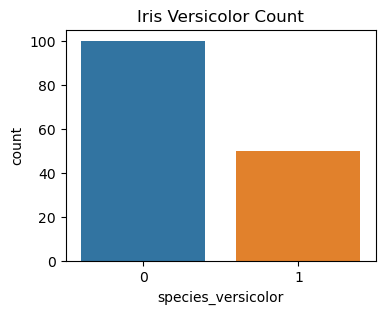

In [98]:
x=plt.subplots(1,1,figsize=(4,3))
sns.countplot('species_versicolor',data=df)
plt.title("Iris Versicolor Count")
plt.show()

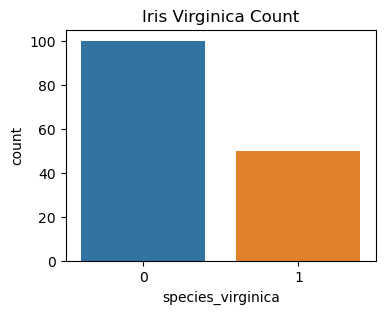

In [99]:
x=plt.subplots(1,1,figsize=(4,3))
sns.countplot('species_virginica',data=df)
plt.title("Iris Virginica Count")
plt.show()

In [100]:
#  c. Document takeaways & any actions.
# sepal length and width have normal distrobutions
#petal length and width do not have  normal distribution
### this may make sepal measurements a better predictor of plant species
# the data set has an even uniform distribution of species amoung the three types




In [101]:
# 3. Bivariate Stats
# 

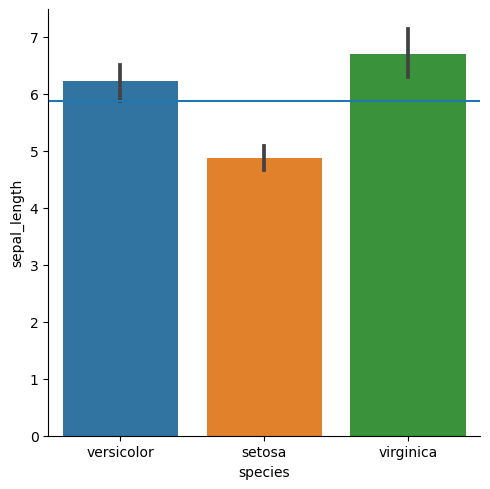

In [102]:
#  a. Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a 
      #horizontal line showing the overall mean of the metric (y-axis).
sns.catplot(x="species", y="sepal_length",data=test, kind="bar")
figsize=(4,3)
#Below is to add a horiz. line at the mean using matplot lib
ax=plt.gca()
ax.axhline(y=5.875556)
plt.show()

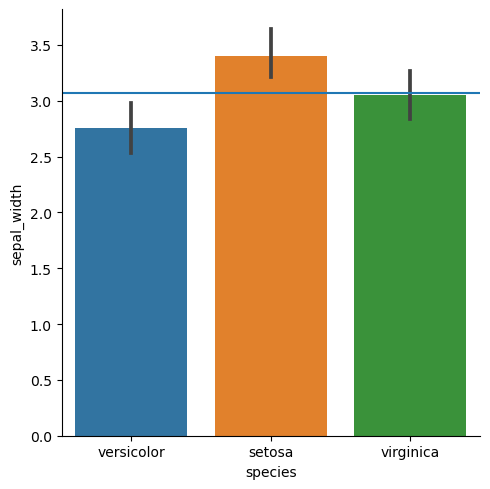

In [103]:
sns.catplot(x="species", y="sepal_width",data=test, kind="bar")
figsize=(4,3)
#Below is to add a horiz. line at the mean using matplot lib
ax=plt.gca()
ax.axhline(y=3.070000)
plt.show()

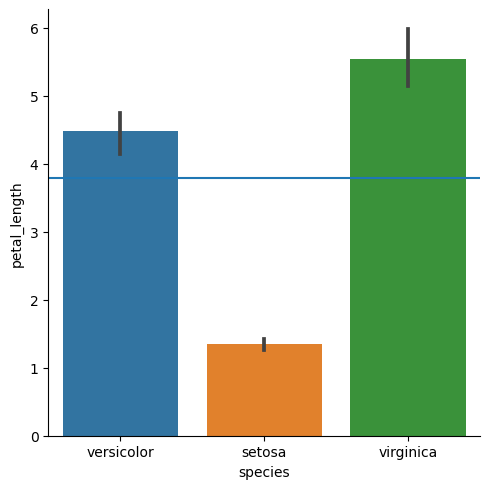

In [104]:
sns.catplot(x="species", y="petal_length",data=test, kind="bar")
figsize=(4,3)
#Below is to add a horiz. line at the mean using matplot lib
ax=plt.gca()
ax.axhline(y=3.793333)
plt.show()

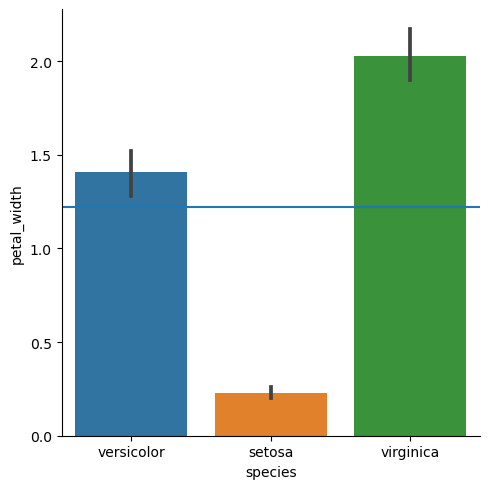

In [105]:
sns.catplot(x="species", y="petal_width",data=test, kind="bar")
figsize=(4,3)
#Below is to add a horiz. line at the mean using matplot lib
ax=plt.gca()
ax.axhline(y=1.223333)
plt.show()

In [106]:
test.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
80,80,5.5,2.4,3.8,1.1,versicolor,1,0
45,45,4.8,3.0,1.4,0.3,setosa,0,0
144,144,6.7,3.3,5.7,2.5,virginica,0,1
110,110,6.5,3.2,5.1,2.0,virginica,0,1
38,38,4.4,3.0,1.3,0.2,setosa,0,0


In [108]:
#  b. For each measurement type, compute the descriptive statistics for each species.
test2 = test.drop(columns=['Unnamed: 0','species_versicolor', 'species_virginica'])

In [109]:
stats = test2.groupby('species').describe()
stats.T

species                setosa  versicolor  virginica
sepal_length count  10.000000   10.000000  10.000000
             mean    4.870000    6.230000   6.690000
             std     0.359166    0.583190   0.723341
             min     4.400000    5.000000   5.800000
             25%     4.625000    6.125000   6.150000
             50%     4.850000    6.300000   6.500000
             75%     5.100000    6.700000   7.375000
             max     5.500000    6.800000   7.700000
sepal_width  count  10.000000   10.000000  10.000000
             mean    3.400000    2.760000   3.050000
             std     0.385861    0.383551   0.347211
             min     3.000000    2.200000   2.500000
             25%     3.125000    2.425000   3.000000
             50%     3.300000    2.850000   3.000000
             75%     3.575000    3.075000   3.150000
             max     4.200000    3.300000   3.800000
petal_length count  10.000000   10.000000  10.000000
             mean    1.350000    4.480000   5.550000
             std     0.143372    0.532917   0.702772
             min     1.000000    3.300000   4.800000
             25%     1.300000    4.425000   5.025000
             50%     1.400000    4.700000   5.300000
             75%     1.400000    4.775000   6.000000
             max     1.500000    5.000000   6.700000
petal_width  count  10.000000   10.000000  10.000000
             mean    0.230000    1.410000   2.030000
             std     0.048305    0.213177   0.240601
             min     0.200000    1.000000   1.800000
             25%     0.200000    1.400000   1.825000
             50%     0.200000    1.450000   1.950000
             75%     0.275000    1.500000   2.175000
             max     0.300000    1.700000   2.500000

In [110]:
#  c. For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test 
      #(scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. 
      #Do the same for the other measurement types.
# 

In [111]:
#  d. Document takeaways & any actions.

In [112]:
# 4. Multivariate Stats

In [ ]:
#  a. Visualize the interaction of each measurement type with the others using a pairplot (or scatter 
      #matrix or something similar) and add color to represent species.
# 

In [113]:
#  b. Visualize two numeric variables of the species. Hint: sns.relplot with hue or col
# 

In [115]:
#c. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the
      #variable name, the y-axis the measure. Add another dimension using color to represent species. 
      #Document takeaways from this visualization.
# 

In [116]:
#  d. Ask a specific question of the data, such as: is the sepal area signficantly different in virginica 
      #compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test.
      #If you use a t-test, be sure assumptions are met (independence, normality, equal variance).
# 

In [117]:
#  e. Document takeaways and any actions.